<h1 style="color: #00BFFF;">00 |</h1>

In [20]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management
import datetime # to play with dates

# 🤖 Machine Learning
from sklearn.linear_model import LinearRegression # linear regression model
from scipy.stats import skew # data distribution assymmetry

In [21]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [22]:
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [23]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "cleaned.csv")
cleaned = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column

<h1 style="color: #00BFFF;">03 | Exploratory Data Analysis (EDA)</h1>

In [24]:
# Quick exploration
cleaned.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,house_lifetime,price
count,21595.000000,21595.000000,21595.000000,2.159500e+04,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,2.159500e+04
mean,3.373281,2.115825,2080.399676,1.510074e+04,1.494003,0.007548,0.234313,3.409863,7.657791,1788.663857,291.735818,1986.684834,12759.359528,2014.322899,0.103218,0.089789,0.068071,0.057745,0.045288,0.102385,0.100857,0.086733,0.111785,0.065247,0.086872,0.082010,49.621162,5.403101e+05
std,0.926291,0.769019,918.111563,4.141433e+04,0.539599,0.086553,0.766422,0.650564,1.173183,827.762140,442.683670,685.226134,27275.475700,0.467595,0.304251,0.285886,0.251874,0.233266,0.207940,0.303161,0.301146,0.281450,0.315109,0.246966,0.281654,0.274386,28.807713,3.673802e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,123.000000,7.700000e+06


<h2 style="color: #008080;">Dealing with Duplicates</h2>

In [25]:
explore_data(cleaned)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0
condition,0,0
grade,0,0
sqft_above,0,0


In [6]:
# So, nothing to do here, moving on!

<h2 style="color: #008080;">Dealing with Data distributions</h2>

In [27]:
cleaned.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'year', 'month_Apr',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'house_lifetime', 'price'],
      dtype='object')

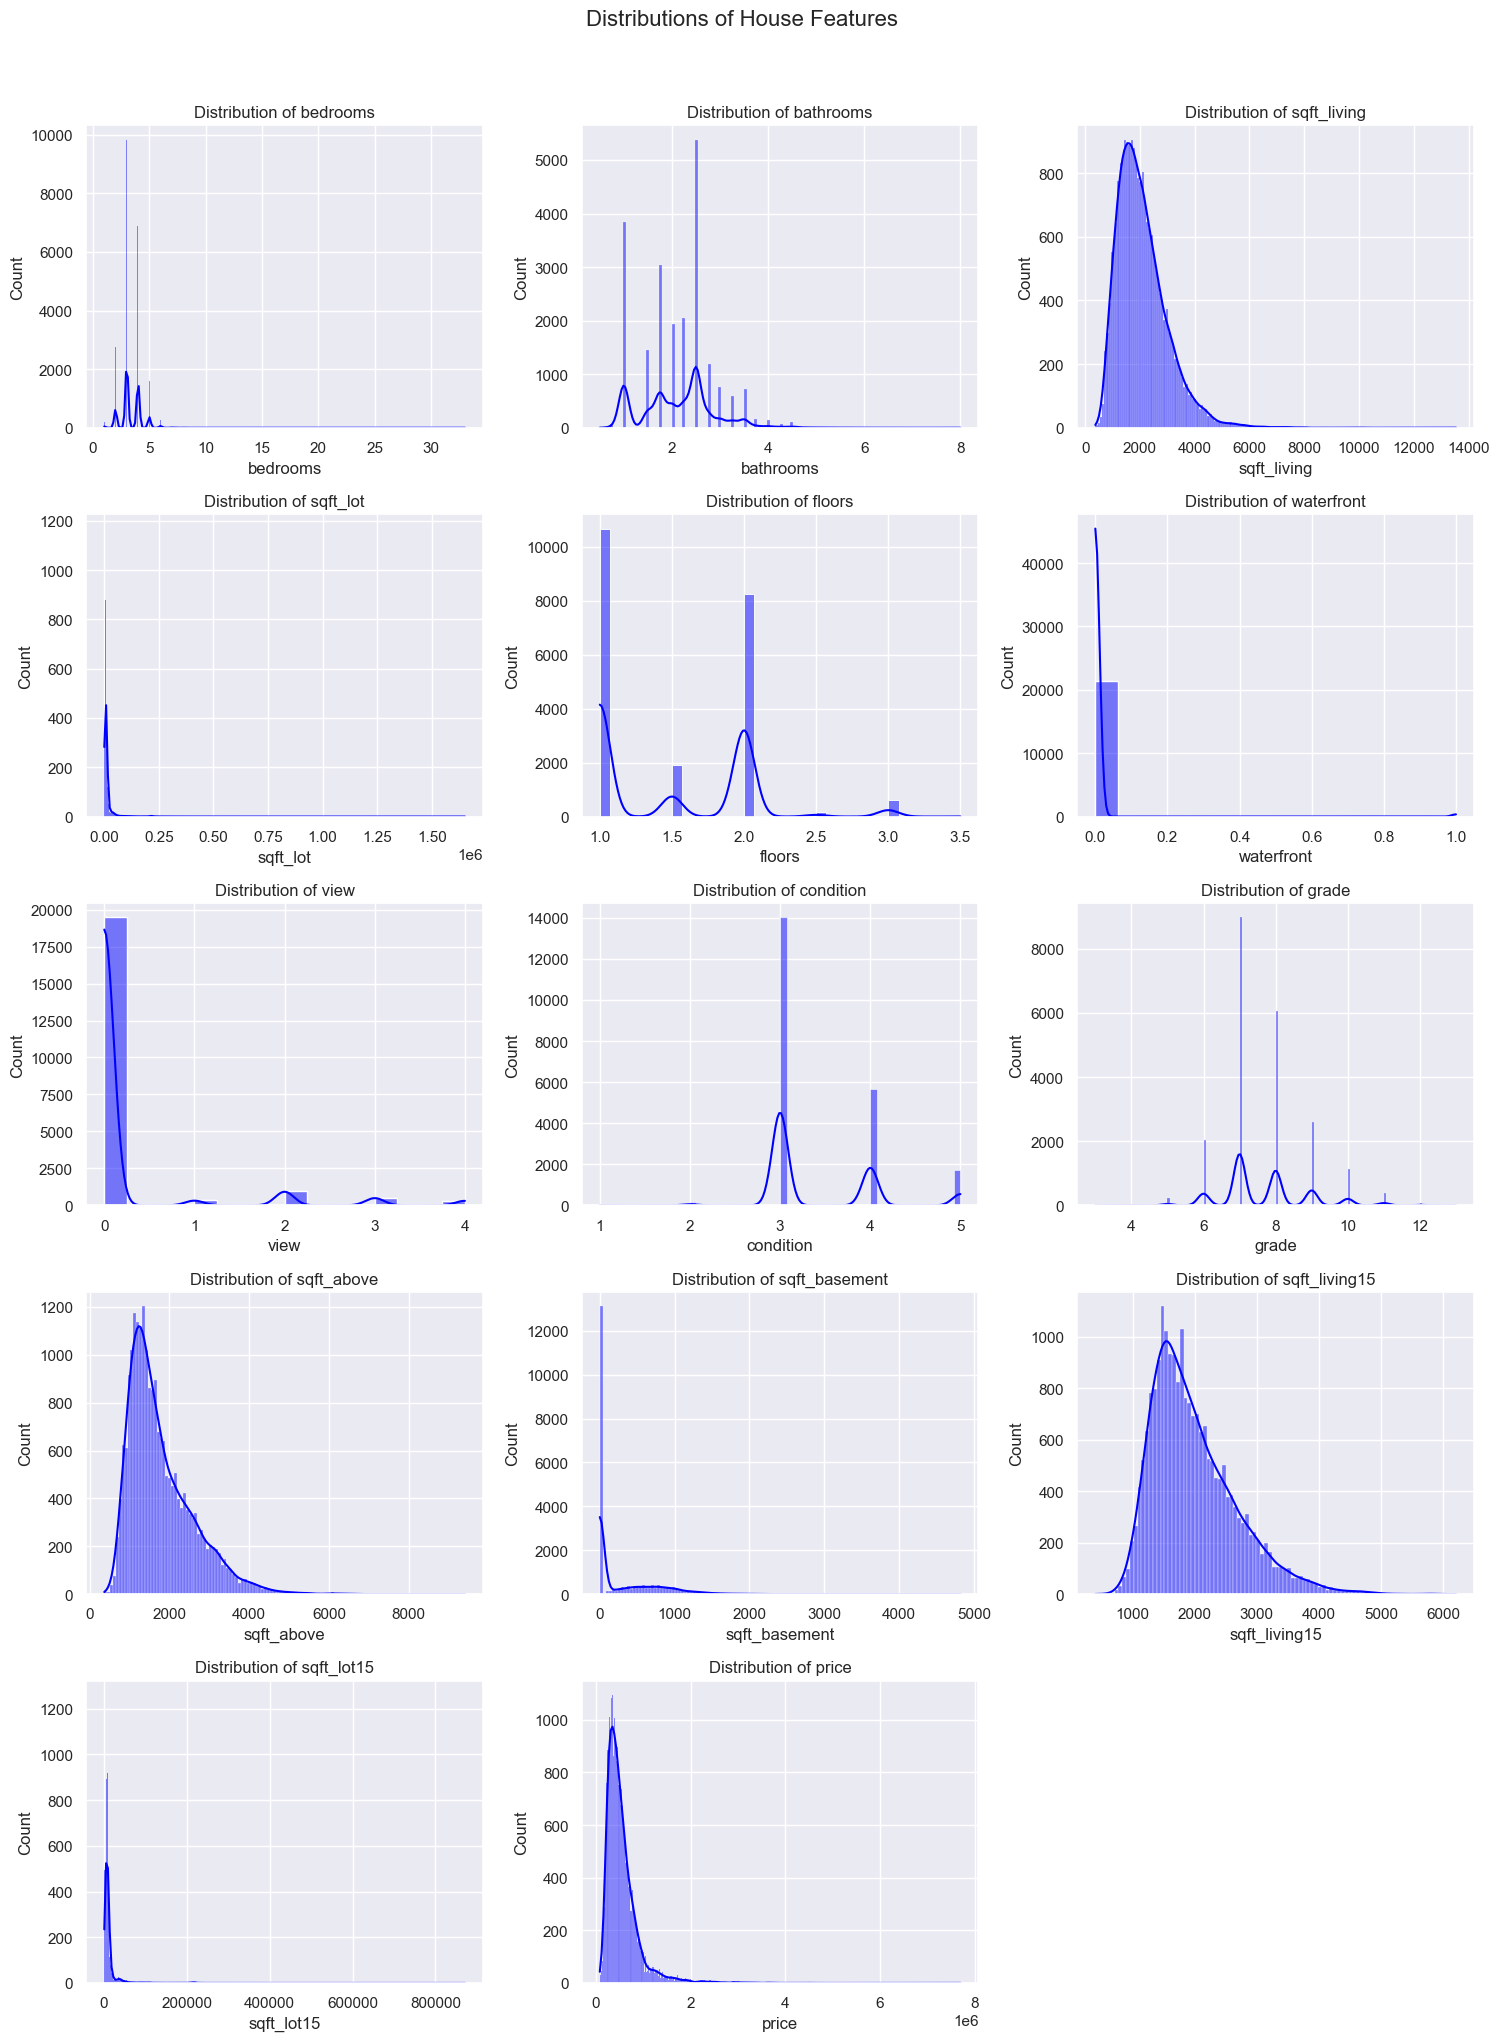

In [35]:
# We will check Data distribtuions for all features, but not month encoded
house_features = cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

# Dark background
sns.set(style="darkgrid")

# Number of rows and columns for the grid
n_features = len(house_features.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Grid of histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(house_features.columns):
    sns.histplot(data=house_features, x=column, kde=True, color="blue", ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

# Removing empty subplots
for i in range(len(house_features.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

fig.suptitle("Distributions of House Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

* Skewed distributions: `sqft_living`, `sqft_above`, `sqft_living15`, `sqft_lot15` and `price` show a positively skewed distribution

In [38]:
cleaned['condition'].value_counts()

3    14018
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [39]:
cleaned['grade'].value_counts()

7     8974
8     6065
9     2613
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

<h2 style="color: #008080;">Dealing with Skewness</h2>

In [37]:
skewed_ones = cleaned[['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']]
                      
# Calculate skewness only for numeric columns
skew_values = skewed_ones.apply(skew)
print(skew_values)

sqft_living      1.473049
sqft_above       1.447316
sqft_living15    1.106766
sqft_lot15       9.523388
price            4.022972
dtype: float64


* **bathrooms**, **sqft_living**, **sqft_above**, **sqft_living15** and **house_lifetime** are good targets for the log transform, to make it more like a bell-shape distribution:

In [12]:
log_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'house_lifetime']

for column in log_columns:
    cleaned[f'{column}_log'] = np.log(cleaned[column])

In [16]:
cleaned = cleaned.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'house_lifetime'], axis=1) # dropping the old distributions

* **sqft_lot**: 
* **waterfront**: 
* **sqft_lot15**: 

As a reminder, Skewness > 1 or < -1 indicates a highly skewed distribution.

In our case, our skwewness are all < 1 & > -1

<h2 style="color: #008080;">Dealing with Outliers</h2>

In [ ]:
# For previously numerical columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=cleaned, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [ ]:
outlier_slayer(cleaned)

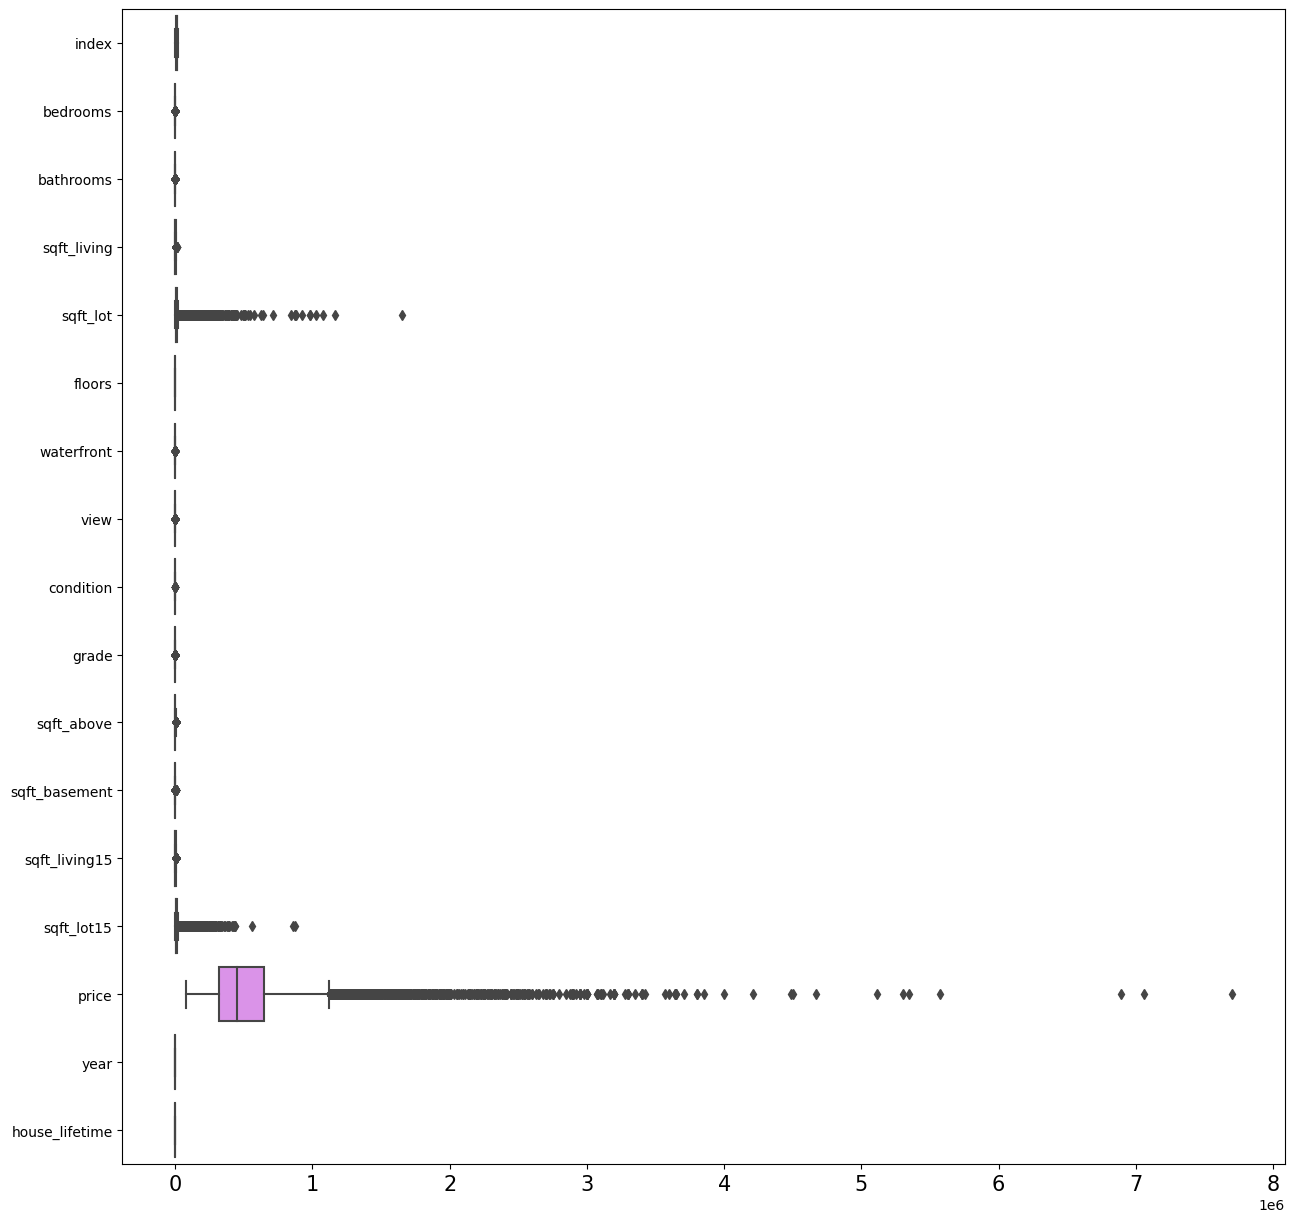

In [29]:
# For previously numerical columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=cleaned, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

<h2 style="color: #008080;">Dealing with Multicollinearity</h2>

<h2 style="color: #008080;">Dealing with Imbalanced Data</h2>

<h1 style="color: #00BFFF;">03 | Explanatory Data Analysis (EDA)</h1>

<h2 style="color: #008080;">Data Extraction</h2>

We will use our data_copy dataset for this

In [12]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "datac.csv")
datac = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column
datac = datac.reset_index()

In [13]:
cleaned = cleaned.drop('month', axis=1) # Temporary, it's still not encoded

<h2 style="color: #008080;">Most important features</h2>

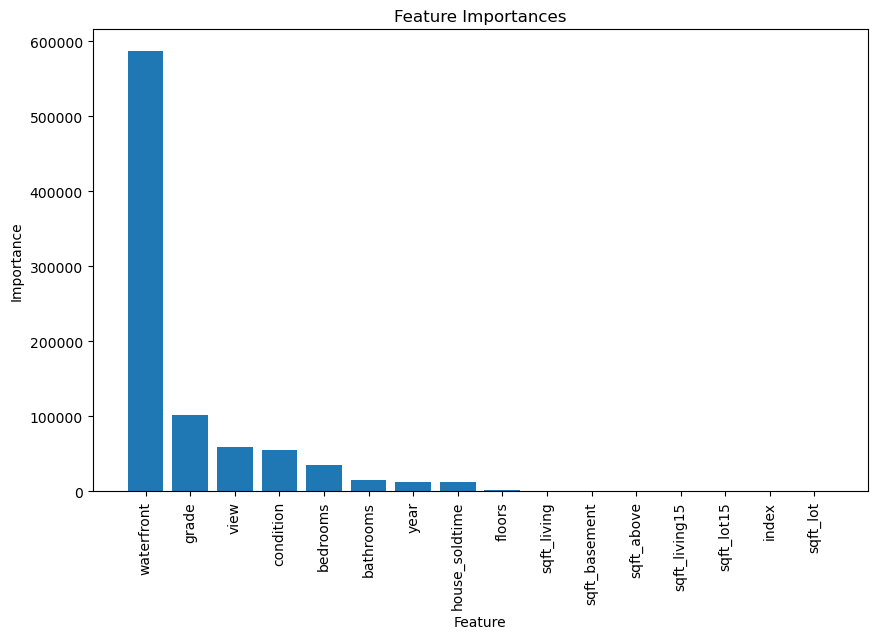

In [14]:
# Split the data into input and target variables
X = cleaned.drop("price", axis=1)
y = cleaned["price"]

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Calculate the feature importances
importances = np.abs(model.coef_)
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

<h2 style="color: #008080;">What can we do with zipcodes?</h2>

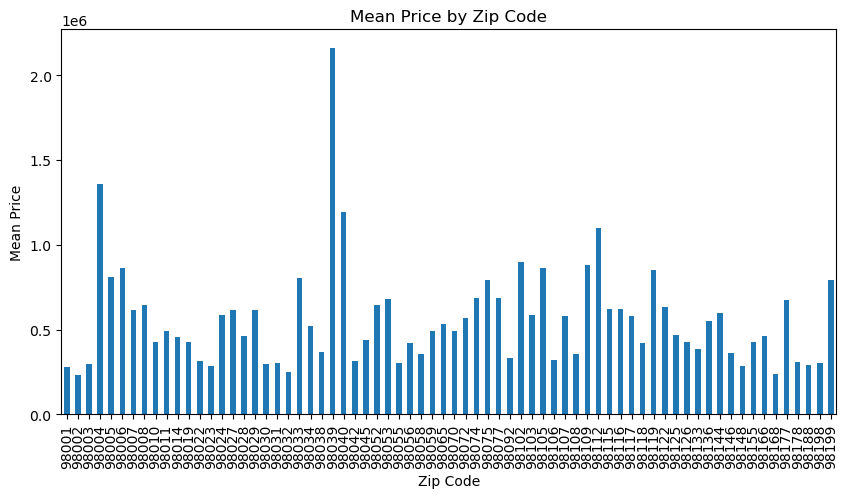

In [16]:
# Group the data by zip code and calculate the mean price for each group
mean_price_by_zip = datac.groupby('zipcode')['price'].mean()

# Plot the mean price by zip code
mean_price_by_zip.plot(kind='bar', figsize=(10, 5))
plt.title('Mean Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.show()

<h2 style="color: #008080;">Calculating the mean price by location</h2>

Using lat, long and price

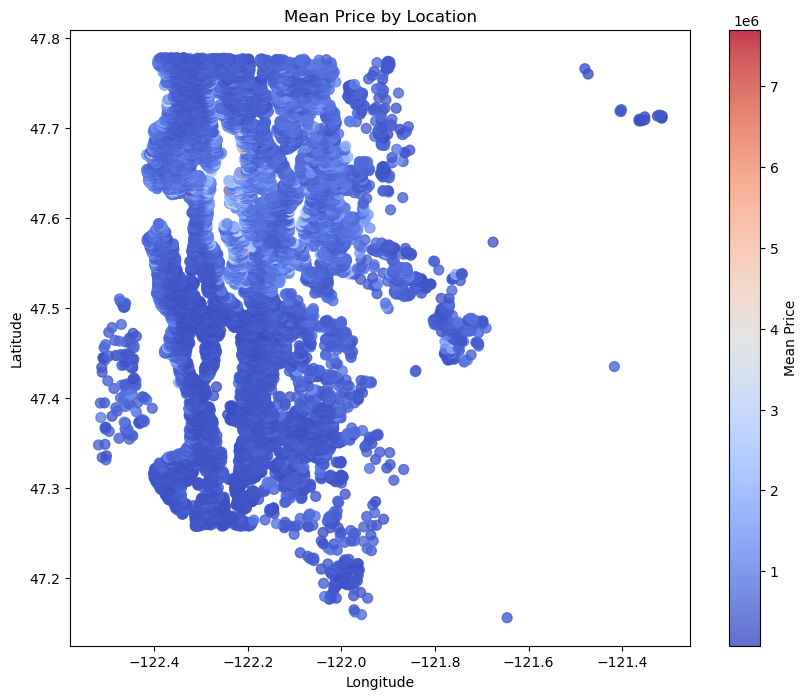

In [18]:
# Group the data by latitude and longitude and calculate the mean price for each group
mean_price_by_location = datac.groupby(['lat', 'long'])['price'].mean().reset_index()

# Set up the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(mean_price_by_location['long'], mean_price_by_location['lat'], s=50, c=mean_price_by_location['price'], cmap='coolwarm', alpha=0.8)

# Add a color bar
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mean Price')

# Set the axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Price by Location')

# Show the plot
plt.show()